AND and XOR tests can be found in unit_test.py

In [ ]:
from neural_network import *
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

In [2]:
seed = 1760229
random.seed(seed)

In [3]:
data = load_iris()

# Data Exploration and Analysis

In [4]:
print(data.target_names)
print(data.keys())

['setosa' 'versicolor' 'virginica']
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
df = pd.DataFrame(data.data).rename(columns = {i:data.feature_names[i] for i in range(len(data.feature_names))})
df['flower_type'] = data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower_type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


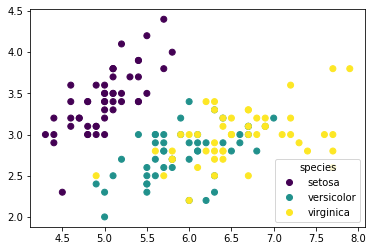

In [7]:
scatter = plt.scatter(np.array(df['sepal length (cm)']), np.array(df['sepal width (cm)']), c = list(df.flower_type))
plt.legend(handles=scatter.legend_elements()[0], 
           title="species", labels = list(data.target_names))
plt.show()

It looks like only setosa is linearly seperable from the others by sepal length/width, and even then there might still be one outlier. We will continue looking for a better option.

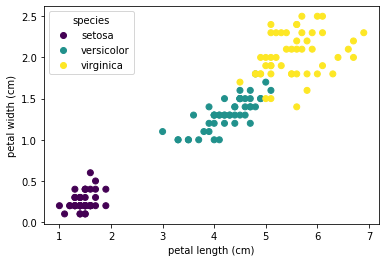

In [8]:
scatter = plt.scatter(np.array(df['petal length (cm)']), np.array(df['petal width (cm)']), c = list(df.flower_type))
plt.legend(handles=scatter.legend_elements()[0], 
           title="species", labels = list(data.target_names))
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()


It looks like setosa and versicolor are linearly seperable by petal width/length! (one will do as well). virginica and versicolor have a bit of crossover, both in length and width. We will continue looking for better options for versicolor virginica.

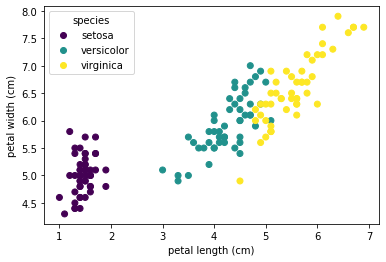

In [9]:
scatter = plt.scatter(np.array(df['petal length (cm)']), np.array(df['sepal length (cm)']), c = list(df.flower_type))
plt.legend(handles=scatter.legend_elements()[0], 
           title="species", labels = list(data.target_names))
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()


Nope

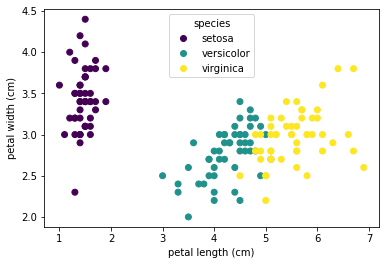

In [10]:
scatter = plt.scatter(np.array(df['petal length (cm)']), np.array(df['sepal width (cm)']), c = list(df.flower_type))
plt.legend(handles=scatter.legend_elements()[0], 
           title="species", labels = list(data.target_names))
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()


Nope

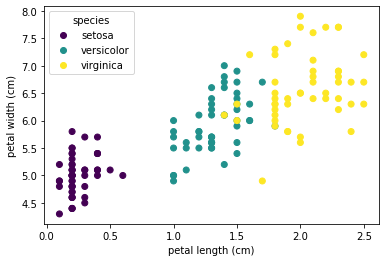

In [11]:
scatter = plt.scatter(np.array(df['petal width (cm)']), np.array(df['sepal length (cm)']), c = list(df.flower_type))
plt.legend(handles=scatter.legend_elements()[0], 
           title="species", labels = list(data.target_names))
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()


Nope

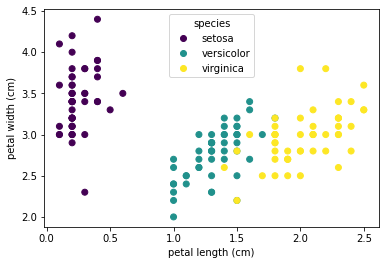

In [12]:
scatter = plt.scatter(np.array(df['petal width (cm)']), np.array(df['sepal width (cm)']), c = list(df.flower_type))
plt.legend(handles=scatter.legend_elements()[0], 
           title="species", labels = list(data.target_names))
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()


it looks like versicolor and virginica aren't linearly seperable in one or two dimensions.

# Classifying Setosa and Versicolor

In [13]:
df1 = df.copy()

In [14]:
df1 = df1[df1.flower_type != 2]

In [15]:
# shuffle the df
df1 = df1.sample(frac = 1, random_state = seed)

In [16]:
X = df1[['sepal length (cm)', 'sepal width (cm)']]
y = df1.flower_type


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=seed)

In [17]:
# we need to define inputs so the perceptron knows how many weights it has to make (we take sepal length and sepal width as input)
inputs = np.zeros(2)
perc = Perceptron(bias=0, activation_function=binary_threshold, inputs=inputs)
perc.set_seed(seed)
perc.randomize_weights()

perc.update(train_inputs=np.array(X_train), targets= list(y_train),verbose=False)

In [18]:
y_pred = [perc.predict(i) for i in np.array(X_test)]

In [19]:
accuracy_score(list(y_test), y_pred)

1.0

In [20]:
print(f"{perc.weights=}\n{perc.bias=}")

perc.weights=[7.530549480513862, -9.61752219454287]
perc.bias=-11.799999999999974


It's theoretically possible that my model doesn't have an accuracy of 100%. The dataset is very small which means that inputs that would normally displace our classification border have a chance to get placed into the test set.

# Classifying Versicolor and Virginica

It's not possible with our model, even in 3 or 4 dimensions.
source: https://www.researchgate.net/figure/Iris-data-set-There-are-three-classes-Setosa-class-is-linearly-separable-from-the-other_fig2_300643220#:~:text=Versicolor%20and%20Virginica%20classes%20are%20not%20linearly%20separable.
